In [69]:
import pandas as pd
import numpy as np
import re
from IPython.display import Image

# Написать функцию для заполнения колонки Sample ID во вкладке Sequencing Sample

In [37]:
# редактировать таблицы, то есть убирать наны или менять отображение данных не буду, чтобы не запутаться

df_specimen = pd.read_excel(open('benchling_data.xlsx', 'rb'), sheet_name='Specimen')

df_plasma = pd.read_excel(open('benchling_data.xlsx', 'rb'), sheet_name='Plasma')

df_extraction = pd.read_excel(open('benchling_data.xlsx', 'rb'), sheet_name='Extraction')

df_library = pd.read_excel(open('benchling_data.xlsx', 'rb'), sheet_name='Library')

df_seq_sample = pd.read_excel(open('benchling_data.xlsx', 'rb'), sheet_name='Sequencing Sample')

In [98]:
df_specimen.head()

,Registry ID,Name,Tumor/Normal,Specimen Type,Clinical Case(s),R&D Case(s),Acceptance Date
0,Spec-000001,BG000011_N_WB,N,WB,BG000011,NaN,2022-06-24
1,Spec-000002,BG000012_N_WB,N,WB,BG000012,NaN,2022-06-24
2,Spec-000003,BG000013_T_WB,T,WB,BG000013,NaN,2022-06-24
3,Spec-000004,BG000014_T_WB,T,WB,BG000014,NaN,2022-06-24
4,Spec-000005,BG000015_N_WB,N,WB,BG000015,NaN,2022-06-23


## Начнем с заполнения строчек для РНК семплов.
Для них результат не зависит от типа ткани, поэтому их проще составить.

In [17]:
# начало строчки SampleID для РНК
RNA_start = "RNASeq-tumor-"

# получим список Name, из которого можно получить
# всю информацию для составления SampleID для РНК
RNA_names = df_seq_sample.Name.values

# паттерн для получения параметров <date>_<sequencer>
# group 1 - date, group 2 - sequencer
pattern_date_seq = re.compile('(\d{6})_(.*?)_')

# паттерн для поиска номера семпла
pattern_sample_num = re.compile('_\d+$')

In [22]:
sample_id_list = []

# проверка РНК или ДНК сэмпл в обработке
for name in RNA_names:
    if 'RNA' in name:
        date_seq = pattern_date_seq.search(name).group(0)
        sample_num = pattern_sample_num.search(name).group(0)
        sampleID = "RNASeq-tumor-" + date_seq + "Sample" + sample_num
        sample_id_list.append(sampleID)
        
sample_id_list

['RNASeq-tumor-220623_NovaD_Sample_1',
 'RNASeq-tumor-220623_NovaD_Sample_2',
 'RNASeq-tumor-220623_NovaD_Sample_3',
 'RNASeq-tumor-220623_NovaD_Sample_4',
 'RNASeq-tumor-220623_NovaD_Sample_5',
 'RNASeq-tumor-220623_NovaD_Sample_6',
 'RNASeq-tumor-220623_NovaD_Sample_7',
 'RNASeq-tumor-220623_NovaD_Sample_8',
 'RNASeq-tumor-220623_NovaD_Sample_9',
 'RNASeq-tumor-220623_NovaD_Sample_10',
 'RNASeq-tumor-220623_NovaD_Sample_11',
 'RNASeq-tumor-220623_NovaD_Sample_12',
 'RNASeq-tumor-220623_NovaD_Sample_13',
 'RNASeq-tumor-220623_NovaD_Sample_14',
 'RNASeq-tumor-220623_NovaD_Sample_15',
 'RNASeq-tumor-220623_NovaD_Sample_16',
 'RNASeq-tumor-220623_NovaD_Sample_17',
 'RNASeq-tumor-220623_NovaD_Sample_18',
 'RNASeq-tumor-220623_NovaD_Sample_19',
 'RNASeq-tumor-220623_NovaD_Sample_20',
 'RNASeq-tumor-220623_NovaD_Sample_21',
 'RNASeq-tumor-220623_NovaD_Sample_22',
 'RNASeq-tumor-220623_NovaD_Sample_23',
 'RNASeq-tumor-220623_NovaD_Sample_24',
 'RNASeq-tumor-220610_NovaB_Sample_1',
 'RNASeq-t

Все получилось, теперь можно приступить к созданию скрипта для ДНК семплов

## Составим SampleID для ДНК семплов
Желаемый SampleID для ДНК должен различаться по типу ткани. Получить тип ткани напрямую из того же датафрейма, как с РНК не получится. Чтобы добраться до нужных данных о типе ткани придется пройти таким путем по датафреймам:
1. Sequencing Sample[Library] --> Library[Name]
2. Library[Name] --> Library[DNA Extraction]
3. Library[DNA Extraction] --> Extraction[Name] 
4. Extraction[Name] --> Extraction[Specimen]

In [54]:
# получим список из колонки Library
seq_sample_Library_list = df_seq_sample.Library.values
seq_sample_Library_list

array(['LIB000001', 'LIB000002', 'LIB000003', 'LIB000004', 'LIB000005',
       'LIB000006', 'LIB000007', 'LIB000008', 'LIB000009', 'LIB000010',
       'LIB000011', 'LIB000012', 'LIB000013', 'LIB000014', 'LIB000015',
       'LIB000016', 'LIB000017', 'LIB000018', 'LIB000019', 'LIB000020',
       'LIB000021', 'LIB000022', 'LIB000023', 'LIB000024', 'LIB000025',
       'LIB000026', 'LIB000027', 'LIB000028', 'LIB000029', 'LIB000030',
       'LIB000031', 'LIB000032', 'LIB000033', 'LIB000034', 'LIB000035',
       'LIB000036', 'LIB000037', 'LIB000038', 'LIB000039', 'LIB000040',
       'LIB000041', 'LIB000042', 'LIB000043', 'LIB000044', 'LIB000045',
       'LIB000046', 'LIB000047', 'LIB000048', 'LIB000049', 'LIB000050',
       'LIB000051', 'LIB000052', 'LIB000053', 'LIB000054', 'LIB000055',
       'LIB000056', 'LIB000057', 'LIB000058', 'LIB000059', 'LIB000060',
       'LIB000061', 'LIB000062', 'LIB000063', 'LIB000064', 'LIB000065',
       'LIB000066', 'LIB000067', 'LIB000068', 'LIB000069', 'LIB0

In [65]:
# эту функцию можно было бы упростить, но, я предполагаю,
# что возможна ситуация, в которой данные будут идти не по порядку,
# а я бы хотел сохранить соответсвие между списками

library_DNA_extraction_list = []

for library in seq_sample_Library_list:
    # нужно получить такой DNA Extraction, который соответствует Name 
    row = df_library.loc[(df_library.Name == library)]
    # составим список 
    library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
library_DNA_extraction_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'D001280',
 'D001281',
 'D001282',
 'D001283',
 'D001284',
 'D001285',
 'D001286',
 'D001287',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [64]:
extraction_Name_list = []

for DNA_extraction in library_DNA_extraction_list:
    # нужно получить такой Name, который соответствует DNA_extraction 
    row = df_extraction.loc[(df_extraction.Name == DNA_extraction)]
    # составим список и удобно его заполним
    if row.empty:
        extraction_Name_list.append('nan')
    else:
        extraction_Name_list.append(row.Specimen.values[0])
extraction_Name_list

['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'BG000011_N_WB',
 'BG000011_N_WB',
 'BG000012_N_WB',
 'BG000012_N_WB',
 'BG000013_T_WB',
 'BG000013_T_WB',
 'BG000014_T_WB',
 'BG000014_T_WB',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

Все почти готово! Метод для составления строчки был получен еще в секции РНК, поэтому сейчас остается только совместить код. Реузльтатом будет список SampleID, который легко закинуть в таблицу.

## Совместим код для РНК и для ДНК в единый скрипт

In [67]:
# получим список Name, из которого можно получить
# всю информацию для составления SampleID для РНК и ДНК
Names = df_seq_sample.Name.values

# Паттерны:
# паттерн для получения параметров <date>_<sequencer>
# group 1 - date, group 2 - sequencer
pattern_date_seq = re.compile('(\d{6})_(.*?)_')
# паттерн для поиска номера семпла
pattern_sample_num = re.compile('_\d+$')

# Для ДНК:
# 1. получим список из колонки Library листа 
seq_sample_Library_list = df_seq_sample.Library.values
# 2. получим DNA_extraction из листа Library
library_DNA_extraction_list = []
for library in seq_sample_Library_list:
    # нужно получить такой DNA Extraction, который соответствует Name 
    row = df_library.loc[(df_library.Name == library)]
    # составим список 
    library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
# 3. получим Specimen из листа Extraction
extraction_Name_list = []
for DNA_extraction in library_DNA_extraction_list:
    # нужно получить такой Name, который соответствует DNA_extraction 
    row = df_extraction.loc[(df_extraction.Name == DNA_extraction)]
    # составим список и удобно его заполним
    if row.empty:
        extraction_Name_list.append('nan')
    else:
        extraction_Name_list.append(row.Specimen.values[0])
        
# итоговый список
sample_id_list = []

i = 0
while i < len(Names):
    date_seq = pattern_date_seq.search(Names[i]).group(0)
    sample_num = pattern_sample_num.search(Names[i]).group(0)
    # РНК
    if 'RNA' in Names[i]:
        sampleID = "RNASeq-tumor-" + date_seq + "Sample" + sample_num
        sample_id_list.append(sampleID)
    # ДНК
    else:
        # ДНК и нормально
        if '_N_' in extraction_Name_list[i]:
            sampleID = "WES-normal-" + date_seq + "Sample" + sample_num
            sample_id_list.append(sampleID)
        # ДНК и опухоль
        else:
            sampleID = "WES-tumor-" + date_seq + "Sample" + sample_num
            sample_id_list.append(sampleID)
    i += 1
# теперь заполним колнку SampleID во вкладке Sequencing Sample 
df_seq_sample['SampleID'] = sample_id_list
df_seq_sample.head()

,Registry ID,Name,Sample Sheet ID,Sample Num,Sequencing Run,Library,SampleID
0,SS000001,220623_NovaD_RNA_Sample_1,NaN,1.0,220623_NovaD_RNA,LIB000001,RNASeq-tumor-220623_NovaD_Sample_1
1,SS000002,220623_NovaD_RNA_Sample_2,RNASeq-tumor-220623_NovaD_Sample_2,2.0,220623_NovaD_RNA,LIB000002,RNASeq-tumor-220623_NovaD_Sample_2
2,SS000003,220623_NovaD_RNA_Sample_3,NaN,3.0,220623_NovaD_RNA,LIB000003,RNASeq-tumor-220623_NovaD_Sample_3
3,SS000004,220623_NovaD_RNA_Sample_4,NaN,4.0,220623_NovaD_RNA,LIB000004,RNASeq-tumor-220623_NovaD_Sample_4
4,SS000005,220623_NovaD_RNA_Sample_5,RNASeq-tumor-220623_NovaD_Sample_5,5.0,220623_NovaD_RNA,LIB000005,RNASeq-tumor-220623_NovaD_Sample_5


Все готово! Задание 1 выполнено. Я не стал выносить его в Python функцию, предолагая, что единая ячейка тетрадки представляет собой функциональную единицу кода. 

# Написать скрипт, который берет на входе benchling_data, заполняет Sample ID и выдает на выходе excel файлы по каждому Sequencing Run со следующими колонками:

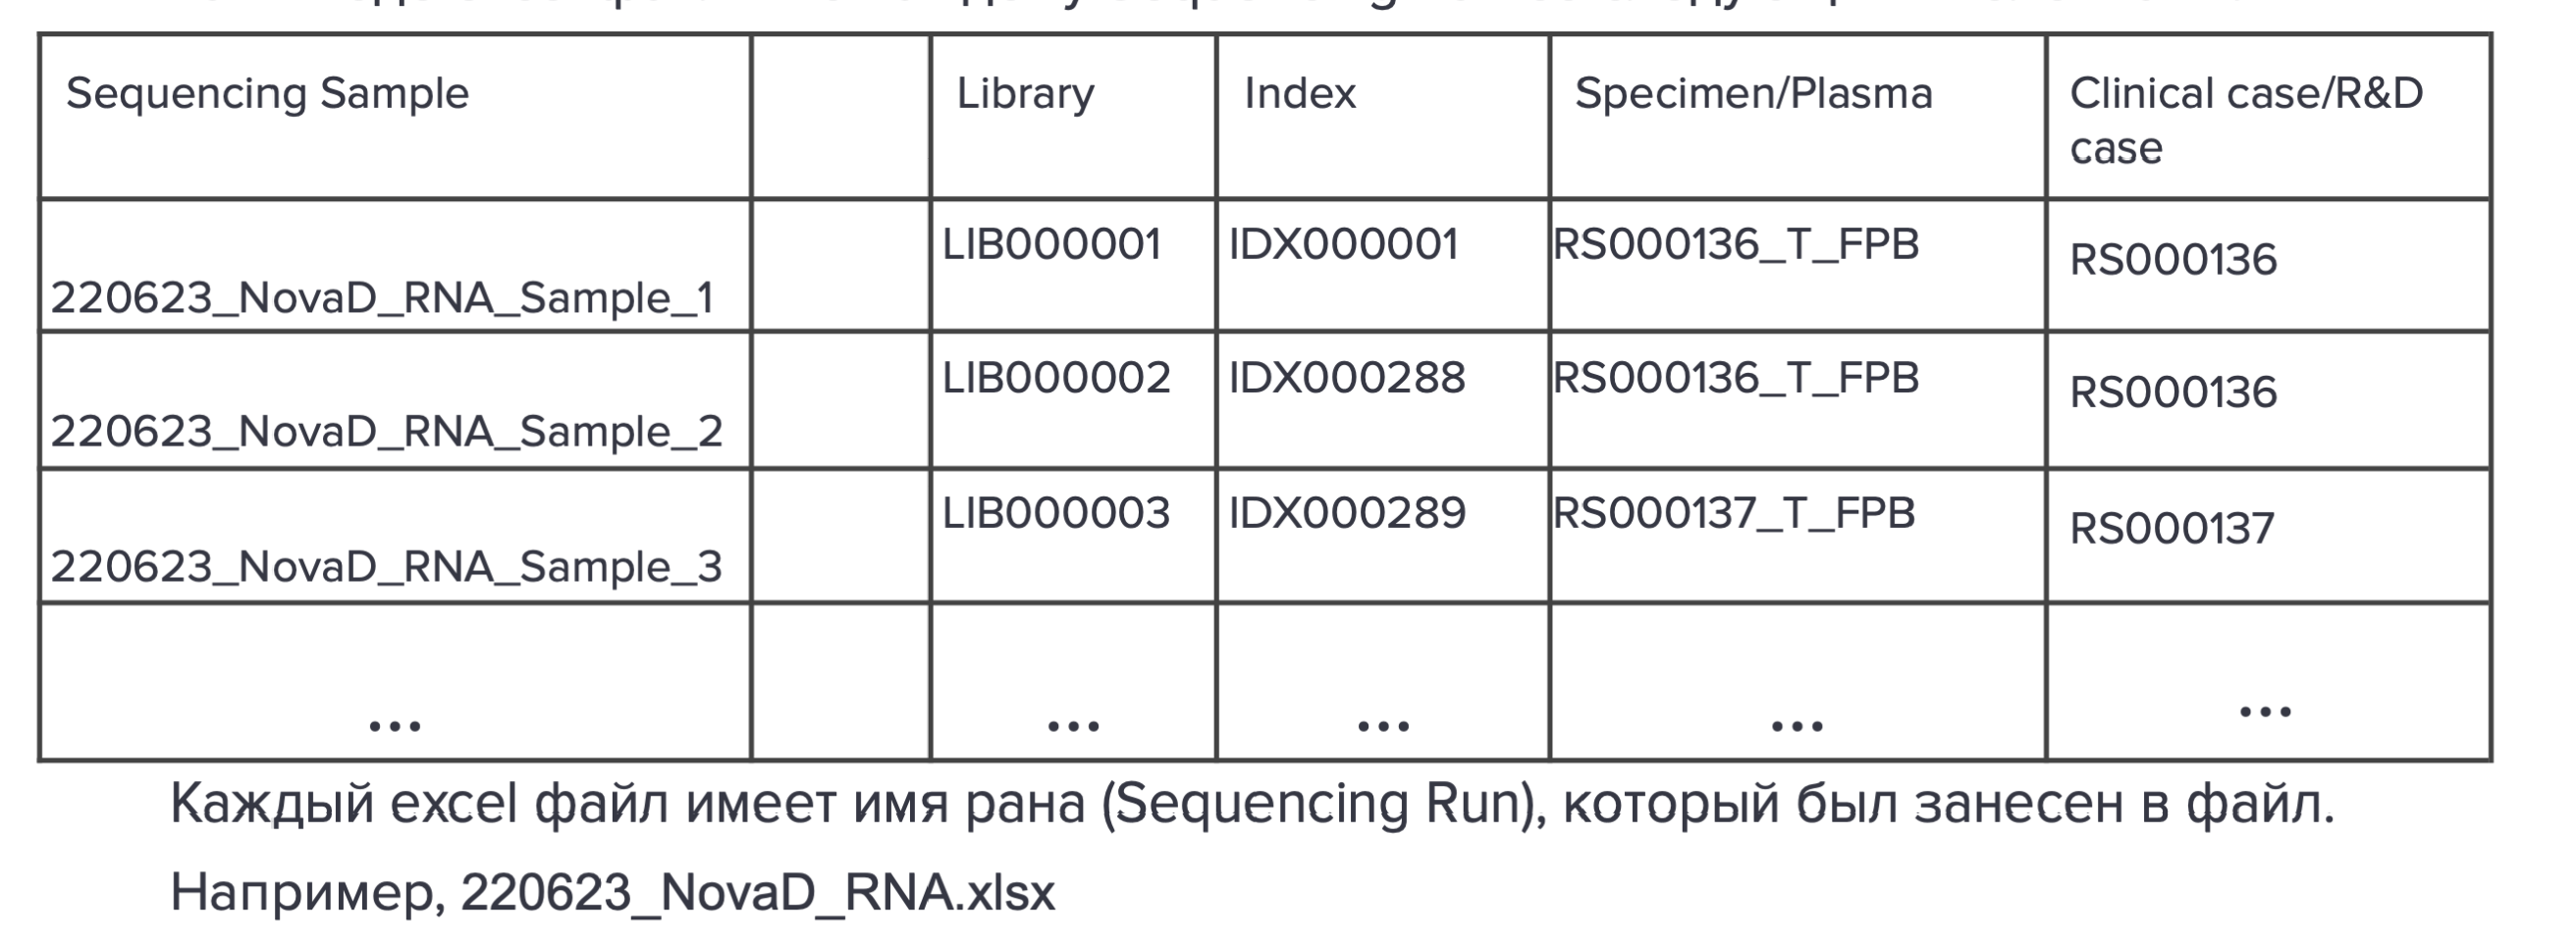

In [70]:
Image("img/table.png")

## Сначала заполним новый датафрейм колонкой Name из листа Sequencing Sample

In [73]:
df_seq_runs = pd.DataFrame(columns=['Sequencing Sample','Library','Index','Specimen/Plasma','Clinical case/R&D case'])
df_seq_runs['Sequencing Sample'] = df_seq_sample.Name
df_seq_runs

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case
0,220623_NovaD_RNA_Sample_1,NaN,NaN,NaN,NaN
1,220623_NovaD_RNA_Sample_2,NaN,NaN,NaN,NaN
2,220623_NovaD_RNA_Sample_3,NaN,NaN,NaN,NaN
3,220623_NovaD_RNA_Sample_4,NaN,NaN,NaN,NaN
4,220623_NovaD_RNA_Sample_5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
71,220610_NovaB_RNA_Sample_50,NaN,NaN,NaN,NaN
72,220610_NovaB_RNA_Sample_51,NaN,NaN,NaN,NaN
73,220610_NovaB_RNA_Sample_52,NaN,NaN,NaN,NaN
74,220610_NovaB_RNA_Sample_53,NaN,NaN,NaN,NaN


## Так же заполним датафрейм колонкой Library из листа Sequencing Sample

In [74]:
df_seq_runs.Library = df_seq_sample.Library
df_seq_runs

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case
0,220623_NovaD_RNA_Sample_1,LIB000001,NaN,NaN,NaN
1,220623_NovaD_RNA_Sample_2,LIB000002,NaN,NaN,NaN
2,220623_NovaD_RNA_Sample_3,LIB000003,NaN,NaN,NaN
3,220623_NovaD_RNA_Sample_4,LIB000004,NaN,NaN,NaN
4,220623_NovaD_RNA_Sample_5,LIB000005,NaN,NaN,NaN
...,...,...,...,...,...
71,220610_NovaB_RNA_Sample_50,LIB000072,NaN,NaN,NaN
72,220610_NovaB_RNA_Sample_51,LIB000073,NaN,NaN,NaN
73,220610_NovaB_RNA_Sample_52,LIB000074,NaN,NaN,NaN
74,220610_NovaB_RNA_Sample_53,LIB000075,NaN,NaN,NaN


## Заполним колонку индекс через колонку Index на листе Library.

In [79]:
# список параметров Library, через который осуществляется связь в заполнении:
seq_runs_Library_list = df_seq_runs.Library.values

library_Index_list = []

for library in seq_runs_Library_list:
    # нужно получить такой Name, который соответствует Library
    row = df_library.loc[(df_library.Name == library)]
    # составим список 
    library_Index_list.append(row['Index'].array[0])
df_seq_runs.Index = library_Index_list
df_seq_runs

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case
0,220623_NovaD_RNA_Sample_1,LIB000001,IDX000001,NaN,NaN
1,220623_NovaD_RNA_Sample_2,LIB000002,IDX000288,NaN,NaN
2,220623_NovaD_RNA_Sample_3,LIB000003,IDX000289,NaN,NaN
3,220623_NovaD_RNA_Sample_4,LIB000004,IDX000290,NaN,NaN
4,220623_NovaD_RNA_Sample_5,LIB000005,IDX000291,NaN,NaN
...,...,...,...,...,...
71,220610_NovaB_RNA_Sample_50,LIB000072,IDX000216,NaN,NaN
72,220610_NovaB_RNA_Sample_51,LIB000073,IDX000217,NaN,NaN
73,220610_NovaB_RNA_Sample_52,LIB000074,IDX000218,NaN,NaN
74,220610_NovaB_RNA_Sample_53,LIB000075,IDX000219,NaN,NaN


## Заполним колонку Specimen/Plasma

1. Каждой строке столбца `Name` листа `Library` соответсвует либо строка `DNA Extraction`, либо `RNA Extraction`.
2. Нужно собрать `DNA Extraction` и `RNA Extraction` в одну колонку и провести соответсвие между `Name` листа `Library`.
3. И тогда через полученную общую `DNA_RNA` колонку провести связь с колонками `Specimen` и `Plasma`.

In [86]:
# список параметров Library, через который осуществляется связь в заполнении:
seq_runs_Library_list = df_seq_runs.Library.values

# получим колонку с DNA синхронизированно с колонкой Library
library_DNA_extraction_list = []

for library in seq_sample_Library_list:
    # нужно получить такой DNA Extraction, который соответствует Name 
    row = df_library.loc[(df_library.Name == library)]
    # составим список 
    library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
df_seq_runs['DNA'] = library_DNA_extraction_list


# получим колонку с RNA синхронизированно с колонкой Library
library_RNA_extraction_list = []

for library in seq_sample_Library_list:
    # нужно получить такой DNA Extraction, который соответствует Name 
    row = df_library.loc[(df_library.Name == library)]
    # составим список 
    library_RNA_extraction_list.append(row['RNA Extraction'].array[0])
df_seq_runs['RNA'] = library_RNA_extraction_list


# объединим колонки в одну 
df_seq_runs['DNA_RNA'] = df_seq_runs['DNA'].fillna(df_seq_runs['RNA'])
# уберем ненужные колонки
df_seq_runs = df_seq_runs.drop('DNA', axis=1)
df_seq_runs = df_seq_runs.drop('RNA', axis=1)
df_seq_runs.head()

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case,DNA_RNA
0,220623_NovaD_RNA_Sample_1,LIB000001,IDX000001,NaN,NaN,R003877
1,220623_NovaD_RNA_Sample_2,LIB000002,IDX000288,NaN,NaN,R003878
2,220623_NovaD_RNA_Sample_3,LIB000003,IDX000289,NaN,NaN,R003879
3,220623_NovaD_RNA_Sample_4,LIB000004,IDX000290,NaN,NaN,R003880
4,220623_NovaD_RNA_Sample_5,LIB000005,IDX000291,NaN,NaN,R003881


In [97]:
# Теперь заполним Specimen/Plasma подобным образом: составим две колонки и совместим их.
# список параметров DNA_RNA, через который осуществляется связь в заполнении:
seq_runs_DNA_RNA_list = df_seq_runs.DNA_RNA.values

# получим колонку с Specimen синхронизированно с колонкой DNA_RNA
extraction_Specimen_list = []

for DNA_RNA in seq_runs_DNA_RNA_list:
    row = df_extraction.loc[(df_extraction.Name == DNA_RNA)]
    extraction_Specimen_list.append(row['Specimen'].array[0])
    
df_seq_runs['Specimen'] = extraction_Specimen_list


# получим колонку с Plasma синхронизированно с колонкой DNA_RNA
extraction_Plasma_list = []

for DNA_RNA in seq_runs_DNA_RNA_list: 
    row = df_extraction.loc[(df_extraction.Name == DNA_RNA)]
    extraction_Plasma_list.append(row['Plasma'].array[0])
    
df_seq_runs['Plasma'] = extraction_Plasma_list

# объединим колонки в одну 
df_seq_runs['Specimen/Plasma'] = df_seq_runs['Specimen'].fillna(df_seq_runs['Plasma'])
# уберем ненужные колонки
df_seq_runs = df_seq_runs.drop('Specimen', axis=1)
df_seq_runs = df_seq_runs.drop('Plasma', axis=1)
df_seq_runs.head()

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case,DNA_RNA
0,220623_NovaD_RNA_Sample_1,LIB000001,IDX000001,RS000136_T_FPB,NaN,R003877
1,220623_NovaD_RNA_Sample_2,LIB000002,IDX000288,RS000136_T_FPB,NaN,R003878
2,220623_NovaD_RNA_Sample_3,LIB000003,IDX000289,RS000137_T_FPB,NaN,R003879
3,220623_NovaD_RNA_Sample_4,LIB000004,IDX000290,RS000137_T_FPB,NaN,R003880
4,220623_NovaD_RNA_Sample_5,LIB000005,IDX000291,RS000137_T_FPB,NaN,R003881


## Заполним колонку Clinical case/R&D case

Чтобы запонлить эту колонку нужна связь с листом `Specimen`, на котором отображены колонки `Clinical case` и `R&D case`. Имеющаяся у нас колонка `Specimen/Plasma` заполнена данными, которые в листе `Specimen` находятся в колонке `Name`. Проведем заполнение по образцу предыдущего раздела. 

In [101]:
# список параметров Specimen/Plasma, через который осуществляется связь в заполнении:
seq_runs_Specimen_Plasma_list = df_seq_runs['Specimen/Plasma'].values

# получим колонку с Clinical синхронизированно с колонкой Specimen/Plasma
specimen_Clinical_list = []

for Specimen_Plasma in seq_runs_Specimen_Plasma_list:
    row = df_specimen.loc[(df_specimen.Name == Specimen_Plasma)]
    specimen_Clinical_list.append(row['Clinical Case(s)'].array[0])
    
df_seq_runs['Clinical case'] = specimen_Clinical_list


# получим колонку с Clinical синхронизированно с колонкой Specimen/Plasma
specimen_RD_list = []

for Specimen_Plasma in seq_runs_Specimen_Plasma_list:
    row = df_specimen.loc[(df_specimen.Name == Specimen_Plasma)]
    specimen_RD_list.append(row['R&D Case(s)'].array[0])
    
df_seq_runs['R&D Case'] = specimen_RD_list

# объединим колонки в одну 
df_seq_runs['Clinical case/R&D case'] = df_seq_runs['Clinical case'].fillna(df_seq_runs['R&D Case'])
# уберем ненужные колонки
df_seq_runs = df_seq_runs.drop('Clinical case', axis=1)
df_seq_runs = df_seq_runs.drop('R&D Case', axis=1)
df_seq_runs = df_seq_runs.drop('DNA_RNA', axis=1)
df_seq_runs.head()

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case
0,220623_NovaD_RNA_Sample_1,LIB000001,IDX000001,RS000136_T_FPB,RS000136
1,220623_NovaD_RNA_Sample_2,LIB000002,IDX000288,RS000136_T_FPB,RS000136
2,220623_NovaD_RNA_Sample_3,LIB000003,IDX000289,RS000137_T_FPB,RS000137
3,220623_NovaD_RNA_Sample_4,LIB000004,IDX000290,RS000137_T_FPB,RS000137
4,220623_NovaD_RNA_Sample_5,LIB000005,IDX000291,RS000137_T_FPB,RS000137


## Теперь сделаем распределение по файлам

1. Добавим в `df_seq_runs` колонку `Sequencing Run` из листа `Sequencing Sample` через сопоставление по колонкам `Library` в обеих таблицах.
2. Поделим таблицу на файлы по колонке `Sequencing Run`.

In [102]:
# Шаг №1
# список параметров Library, через который осуществляется связь в заполнении:
seq_runs_Library_list = df_seq_runs.Library.values

seq_sample_Sequencing_Run_list = []

for library in seq_runs_Library_list:
    # нужно получить такой Name, который соответствует Library
    row = df_seq_sample.loc[(df_seq_sample.Library == library)]
    # составим список 
    seq_sample_Sequencing_Run_list.append(row['Sequencing Run'].array[0])
df_seq_runs['Sequencing Run'] = seq_sample_Sequencing_Run_list
df_seq_runs.head()

,Sequencing Sample,Library,Index,Specimen/Plasma,Clinical case/R&D case,Sequencing Run
0,220623_NovaD_RNA_Sample_1,LIB000001,IDX000001,RS000136_T_FPB,RS000136,220623_NovaD_RNA
1,220623_NovaD_RNA_Sample_2,LIB000002,IDX000288,RS000136_T_FPB,RS000136,220623_NovaD_RNA
2,220623_NovaD_RNA_Sample_3,LIB000003,IDX000289,RS000137_T_FPB,RS000137,220623_NovaD_RNA
3,220623_NovaD_RNA_Sample_4,LIB000004,IDX000290,RS000137_T_FPB,RS000137,220623_NovaD_RNA
4,220623_NovaD_RNA_Sample_5,LIB000005,IDX000291,RS000137_T_FPB,RS000137,220623_NovaD_RNA


In [104]:
# Шаг №2

runs = df_seq_runs['Sequencing Run'].unique()

for run in runs:
    new_df = df_seq_runs.loc[df_seq_runs['Sequencing Run']==run,:]
    new_df = new_df.drop('Sequencing Run', axis=1)
    new_df.to_excel(run + '.xlsx', index=False)

Готово! Файлы сохранены.

# Обернуть все обращения к датафрейму в обработчик запросов. 

Разрешено делать не более 20 запросов в 30 секунд. То есть, если мы проходимся циклом по всем семплам, можно обрабатывать (читать или записывать) по 20 строк в 30 секунд.

In [115]:
import time
import sys

# true, если прошло больше 30 секунд
def time_passed(oldepoch):
    return time.time() - oldepoch >= 30

# показывает оставшееся время в секундах, округляется к ближайшему целому
def time_left(oldepoch):
    return round(30 - (time.time() - oldepoch))

In [ ]:
# Для примера будем пользоваться вот этим кусочком скрипта, который ни на что не повлияет.
# Остальные запросы в базу оформелны подобным образом, 
# поэтому я продемнострирую обработчик обращений на этом конкретном примере

library_DNA_extraction_list = []

for library in seq_sample_Library_list:
    # нужно получить такой DNA Extraction, который соответствует Name 
    row = df_library.loc[(df_library.Name == library)]
    # составим список 
    library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
library_DNA_extraction_list

In [118]:
# Во всех скриптах в тетрадке обращение к датафрейму происходит внутри цикла.
# Я думаю, в таком случае можно не делать deque очередь,
# а просто поставить счетчик и добавить к нему обработчик абсолютного времени,
# чтобы в течение 30 секунд счетчик мог набирать значения <= 20, а после чего обнулялся

# получим список из колонки Library
seq_sample_Library_list = df_seq_sample.Library.values

library_DNA_extraction_list = []

counter_requests = 0
oldepoch = time.time()
for library in seq_sample_Library_list:
    print(counter_requests, time_left(oldepoch))
    # если прошло меньше 30 секунд и совершено меньше 20 запросов, то
    # можно сделать еще запрос
    if not time_passed(oldepoch) and counter_requests < 20:
        row = df_library.loc[(df_library.Name == library)]
        counter_requests += 1
        library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
    # если прошло больше 30 секунд и совершено меньше 20 запросов, то
    # можно сделать еще запрос и нужно обнулить время
    elif time_passed(oldepoch) and counter_requests < 20:
        oldepoch = time.time()
        row = df_library.loc[(df_library.Name == library)]
        counter_requests += 1
        library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
    # если количество запросов = 20, тогда
    # надо остановить исполнение пока не пройдут отведенные 30 секунд
    # а потом исполнить 
    else:
        print("Timer: ")
        for i in range(time_left(oldepoch),0,-1):
            sys.stdout.write(str(i)+' ')
            sys.stdout.flush()
            time.sleep(1)
        print("\n")
        counter_requests = 0
        oldepoch = time.time()
        row = df_library.loc[(df_library.Name == library)]
        counter_requests += 1
        library_DNA_extraction_list.append(row['DNA Extraction'].array[0])

0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
Timer: 
30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
Timer: 
30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
Timer: 
30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30


In [110]:
library_DNA_extraction_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'D001280',
 'D001281',
 'D001282',
 'D001283',
 'D001284',
 'D001285',
 'D001286',
 'D001287',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

Все отработало верно! В 30 секунд отправляется не более 20 запросов. 

# Тест

Написать тест, который логирует (пишет в любом формате) сколько запросов было 
сделано к таблице и выдает Fail, если запросы были превышены или Success, если 
запросов в 30 секунд было не более 20.

In [ ]:
# Для примера приведу функцию из предыдущего раздела.
# Я изменю ее, чтобы каждое обращение в датафрейм логгировалось количественно и качественно.

In [132]:
def get_from_df():
    # получим список из колонки Library
    seq_sample_Library_list = df_seq_sample.Library.values

    library_DNA_extraction_list = []
    
    # логи для теста
    log_list = []
    full_counter = 0

    counter_requests = 0
    oldepoch = time.time()
    
    for library in seq_sample_Library_list:
        print(counter_requests, time_left(oldepoch))
        # если прошло меньше 30 секунд и совершено меньше 20 запросов, то
        # можно сделать еще запрос
        if not time_passed(oldepoch) and counter_requests < 20:
            row = df_library.loc[(df_library.Name == library)]
            counter_requests += 1
            full_counter += 1
            log_list.append('Success')
            library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
        # если прошло больше 30 секунд и совершено меньше 20 запросов, то
        # можно сделать еще запрос и нужно обнулить время
        elif time_passed(oldepoch) and counter_requests < 20:
            oldepoch = time.time()
            row = df_library.loc[(df_library.Name == library)]
            counter_requests += 1
            full_counter += 1
            log_list.append('Success')
            library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
        # если количество запросов = 20, тогда
        # надо остановить исполнение пока не пройдут отведенные 30 секунд
        # а потом исполнить 
        else:
            print("Timer: ")
            for i in range(time_left(oldepoch),0,-1):
                sys.stdout.write(str(i)+' ')
                sys.stdout.flush()
                time.sleep(1)
            print("\n")
            counter_requests = 0
            oldepoch = time.time()
            # добавим запись об успешных 30 секундах в логи
            row = df_library.loc[(df_library.Name == library)]
            counter_requests += 1
            full_counter += 1
            log_list.append('Success')
            library_DNA_extraction_list.append(row['DNA Extraction'].array[0])
    # вернем логи
    return (full_counter, log_list)

In [133]:
import unittest

df_size = len(df_seq_sample.index)

def succ_check(df_size, log_list):
    return len(log_list) == df_size

class TestNotebook(unittest.TestCase):
    def test_get_from_df(self):
        succ = (df_size, True)
        result = get_from_df()
        result = (result[0], succ_check(result[0], result[1]))
        self.assertEqual(result, succ)
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_get_from_df (__main__.TestNotebook) ... 

0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
Timer: 
30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
Timer: 
30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
Timer: 
30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30


ok

----------------------------------------------------------------------
Ran 1 test in 90.482s

OK


# Обработать возникновение ошибки ConnectTimeoutError

Обработать возникновение ошибки ConnectTimeoutError, которая возникает в случае недоступности базы данных (нашей таблицы) в течение некоторого времени. 

При возникновении ошибки - подождать минуту и попробовать запрос снова. Эта  ошибка может возникать как при чтении таблицы, так и при её обработке. 

Так как ConnectTimeoutError, не может возникнуть при обработке эксель файла, только при работе с реальной базой данных, в данном пункте будет проверяться  логика, где была поставлена обработка, как представлен delay и повторный запуск.

In [ ]:
# В качестве примера я буду использовать функцию из предыдущего раздела
while True:
    try:
        get_from_df()
        break
    except ConnectTimeoutError:
        time.sleep(60)
    